# RNN

In [10]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
max_features = 15000
max_len = 130
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 130), (25000, 130))

In [12]:
model_layers = [
    Embedding(max_features, 32),
    SimpleRNN(16, input_shape=(max_features,max_len), activation="relu"),
    Dense(1, activation='sigmoid'),
]
model = Sequential(model_layers)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          480000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 34s 40ms/step - loss: 0.6324 - accuracy: 0.6378 - val_loss: 0.5763 - val_accuracy: 0.7409
Epoch 2/5
782/782 [==============================] - 26s 34ms/step - loss: 0.3764 - accuracy: 0.8446 - val_loss: 0.3950 - val_accuracy: 0.8243
Epoch 3/5
782/782 [==============================] - 32s 41ms/step - loss: 0.2370 - accuracy: 0.9062 - val_loss: 0.3766 - val_accuracy: 0.8440
Epoch 4/5
782/782 [==============================] - 31s 39ms/step - loss: 0.1621 - accuracy: 0.9381 - val_loss: 0.3935 - val_accuracy: 0.8458
Epoch 5/5
782/782 [==============================] - 26s 33ms/step - loss: 0.1204 - accuracy: 0.9560 - val_loss: 0.4909 - val_accuracy: 0.8044


In [14]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.632417,0.63780,0.576314,0.74092
1,0.376401,0.84460,0.394997,0.82432
2,0.237013,0.90624,0.376582,0.84400
3,0.162143,0.93812,0.393454,0.84576
4,0.120432,0.95604,0.490947,0.80436


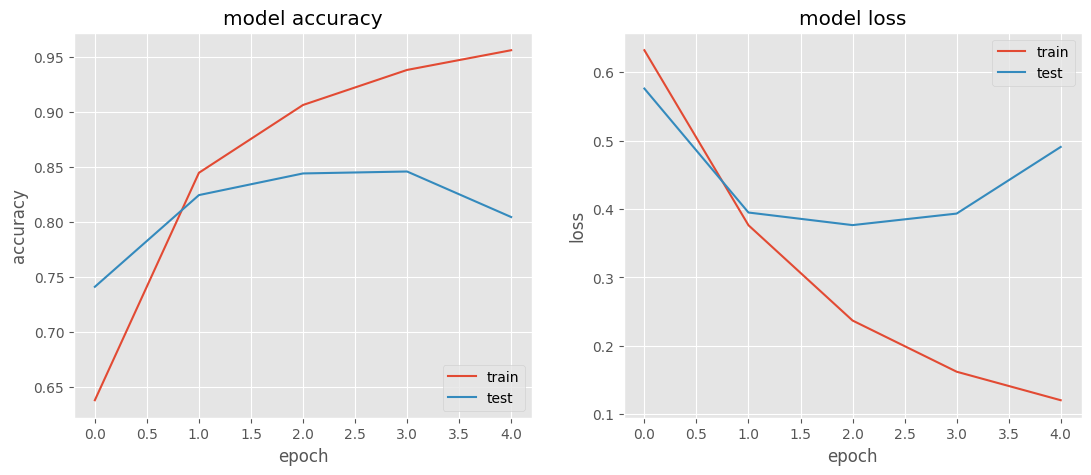

In [15]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

plt.sca(axis[0])
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

plt.sca(axis[1])
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right');